# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
# import libraries
import nltk
nltk.download('punkt')
#punkt - This tokenizer divides a text into a list of sentences by using an unsupervised algorithm
# to build a model for abbreviation words, collocations, and words that start sentences.
nltk.download('stopwords')
nltk.download('wordnet')
#wordnet-WordNET is a lexical database of words in more than 200 languages in which we have adjectives, adverbs, nouns,
# and verbs grouped differently into a set of cognitive synonyms, where each word in the database is expressing its distinct concept.
nltk.download('omw')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
# PortStemmer - for stemming
# WordNetLematizer - for lemmatization
import re # for regular expression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Dataset
df = pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


# EDA & Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [5]:
# Checking for null values
df.isna().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [6]:
# Checking predefined no.of cluster
df['Data'].nunique()

19466

In [7]:
df.describe()  # data should be normalized

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [8]:
df['Data'].value_counts()

Xref: cantaloupe.srv.cs.cmu.edu talk.politics.guns:53307 talk.politics.medicine:1641 talk.politics.mideast:75377 talk.politics.misc:176875 talk.politics.soviet:22962 talk.politics.space:2659 talk.politics.theory:19580 talk.rape:7211 talk.religion.misc:82765\nNewsgroups: talk.politics.guns,talk.politics.medicine,talk.politics.mideast,talk.politics.misc,talk.politics.soviet,talk.politics.space,talk.politics.theory,talk.rape,talk.religion.misc\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!emory!wupost!uwm.edu!cs.utexas.edu!uunet!orca!mesa!rthomson\nFrom: Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Waldrop)\nSubject: Celebrate Liberty!  1993\nMessage-ID: <1993Apr5.201336.16132@dsd.es.com>\nFollowup-To: talk.politics.misc\nOriginator: rthomson@mesa\nX-Sequence: 12\nSender: usenet@dsd.es.com\nNntp-Posting-Host: 130.187.85.21\nReply-To: Bob.Waldrop@f418.n104.z1.fidonet.org (Bob Waldrop)\nX-Us-Mail: P.O. Box 526175, Salt Lake City, UT 84152\nX-Te

In [9]:
corr_matrix = df.corr()
corr_matrix["Unnamed: 0"].sort_values(ascending=False)

C:\Users\Kajal\AppData\Local\Temp\ipykernel_8972\1680669653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Unnamed: 0    1.0
Name: Unnamed: 0, dtype: float64

In [10]:
# Correlation Heatmap

C:\Users\Kajal\AppData\Local\Temp\ipykernel_8972\2238279612.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)


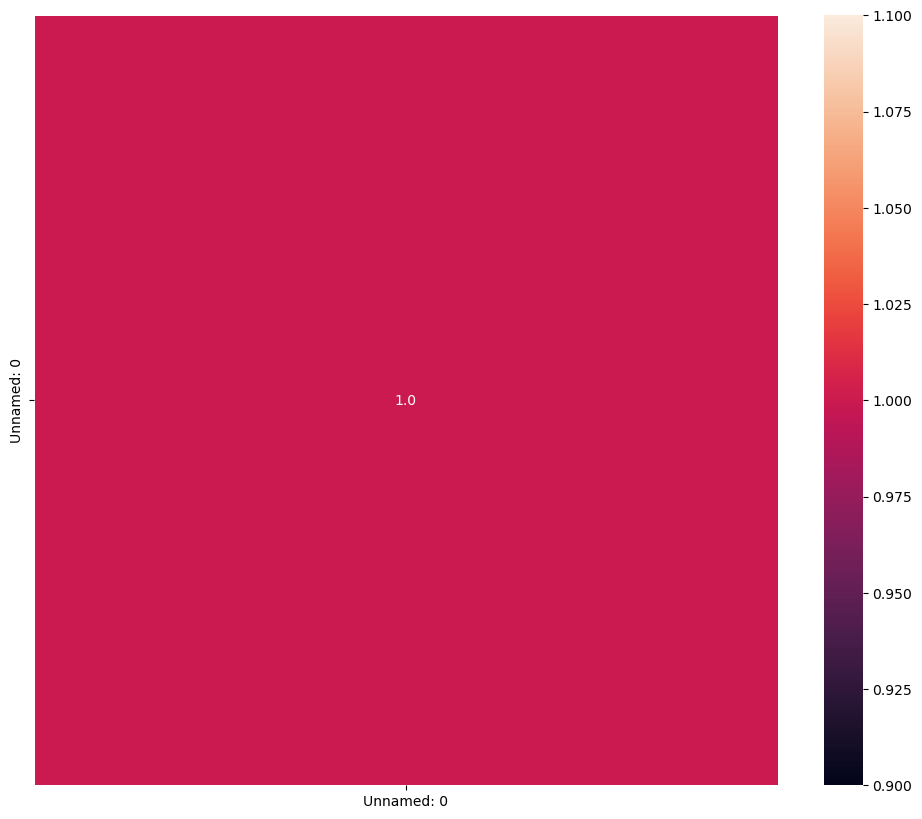

In [11]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

# Tokenization
is the process of breaking down a stream of text into words, phrases or symbols known as tokens

In [12]:
from nltk.tokenize import word_tokenize
df =word_tokenize('I hate this novel!'.lower())
print(df)

['i', 'hate', 'this', 'novel', '!']


In [13]:
df[0]

'i'

# What if the text is really long?

In [14]:
#split into sentences
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize('''I love this book! Though I hate the beginning. It would be great for you.''')
for s in sentences:print(s)

I love this book!
Though I hate the beginning.
It would be great for you.


# Naive Bayes Algorithm
This is a classification algorithm that works on Bayes theorem of probability to predict the class of unknown outcome. It assumes that the presence of a particular feature in a class in unrelated to the presence of any other feature.

In [15]:
import nltk.classify.util #calculates accuracy
from nltk.classify import NaiveBayesClassifier #imports the classifier Naive Bayes
from nltk.corpus import movie_reviews #imports movie reviews from nltk
from nltk.corpus import stopwords #imports stopwords from nltk
from nltk.corpus import wordnet #imports wordnet(lexical database for the english language) from nltk

In [16]:
#import movie_reviews
from nltk.corpus import movie_reviews

In [17]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [18]:
#frequency distribution of words in movie review
all_words = movie_reviews.words()
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(10)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

In [19]:
from nltk.tokenize import word_tokenize
words =word_tokenize('I hate this novel!'.lower())
print(words)

['i', 'hate', 'this', 'novel', '!']


In [20]:
words[0]

'i'

In [21]:
#split into sentences
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize('''I love this book! Though I hate the beginning. It would be great for you.''')
for s in sentences:print(s)

I love this book!
Though I hate the beginning.
It would be great for you.


In [22]:
#import movie_reviews
from nltk.corpus import movie_reviews

#see words in the review
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [23]:
movie_reviews.categories()

['neg', 'pos']

In [24]:
#frequency distribution of words in movie review
all_words = movie_reviews.words()
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(10)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

# Stopwords
These are words that carry little or no meaning in a sentence, but are really common(High frequency words). eg a, I , is, the etc

When doing Language processing, we need to get rid of these words since they take up a large part of any sentence without adding any context or info.

In [25]:
#inbuilt list of stopwords in nltk
stopwords.words('english')[:16]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself']

# How do we remove stopwords?

In [26]:
sent = "the program was open to all women between the ages of 17 and 35, in good health, who had graduated from an accredited high school"

In [27]:
#a token is a word or entity in a text
words = word_tokenize(sent)
useful_words = [word for word in words if word not in stopwords.words('english')]
print(useful_words)
['program', 'open', 'women', 'ages', '17', '35', ',', 'good', 'health', ',', 'graduated', 'accredited', 'high', 'school']

['program', 'open', 'women', 'ages', '17', '35', ',', 'good', 'health', ',', 'graduated', 'accredited', 'high', 'school']


['program',
 'open',
 'women',
 'ages',
 '17',
 '35',
 ',',
 'good',
 'health',
 ',',
 'graduated',
 'accredited',
 'high',
 'school']

In [28]:
# This is how the Naive Bayes classifier expects the input
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [29]:
create_word_features(["the", "quick", "brown", "quick", "a", "fox"])

{'quick': True, 'brown': True, 'fox': True}

In [30]:
neg_reviews = [] #We creates an empty list

#loop over all the files in the neg folder and applies the create_word_features
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words),"negative")) 
    
print(len(neg_reviews))

1000


In [31]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))
    
#print(pos_reviews[0])    
print(len(pos_reviews))
 

1000


# Training and Testing the Naive Bayes Classifier

In [32]:
train_set = neg_reviews[:750] + pos_reviews[:750]
test_set =  neg_reviews[750:] + pos_reviews[750:]
print(len(train_set),  len(test_set))

1500 500


In [33]:
#create the NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_set)

In [34]:
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)

72.39999999999999


In [35]:
review_emoji_movie = '''
This engaging adventure triumphs because of its empowering storyline, which pays tribute to Polynesian culture, and because of its feel-good music, courtesy of Hamilton creator Lin-Manuel Miranda.
'''

In [36]:
words = word_tokenize(review_emoji_movie)
words = create_word_features(words)
classifier.classify(words)

'positive'

In [37]:
data= pd.read_csv('blogs_categories.csv')

In [38]:
data

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [39]:
len(data)

19997

In [40]:
# in this paragraph special symbols, quotation marks, punchuation symbols, emojis are present
# these are all unnecessary things.
# Tokenization
# Word Tokenization

document = "We are learning tokenization in NLP"
nltk.word_tokenize(document)


['We', 'are', 'learning', 'tokenization', 'in', 'NLP']

In [41]:
len(document)

35

In [42]:
#Sentence Tokenization
sent = nltk.sent_tokenize("data")

In [43]:
len(data)

19997

In [44]:
sent[0]

'data'

In [45]:
# Text Cleaning - remove unnecessary things - punctuation marks, symbols, emojis, etc. using sub()
# Text normalization - convert each word in lower case
#  sub() returns a string where all matching occurrences of the specified pattern are replaced by the replace string.
corpus = []

for i in range(len(sent)):
  txt = re.sub('[^a-zA-Z]',' ',sent[i])# except a-zA-Z remove everything from each sentence
  txt = txt.lower()
  corpus.append(txt)
     

In [46]:
corpus

['data']

In [47]:
# now we can perform stemming and lemmatization
#Stemming
stemmer = PorterStemmer()
     

In [48]:
stemmer.stem("goes")

'goe'

In [49]:
stemmer.stem("Lebal")

'lebal'

In [50]:
stemmer.stem("Data")

'data'

In [51]:
stemmer.stem('history')

'histori'

In [52]:
stemmer.stem('finally')

'final'

In [53]:
stemmer.stem("developed")

'develop'

In [54]:
for i in corpus:
  words = nltk.word_tokenize(i)
  print(words)
  # we get separate list for each sentence

['data']


In [55]:
# Perform Tokenization, stemming and stop word removal

for i in corpus:
  words = nltk.word_tokenize(i) # for each sentence in corpus perform word tokenization
  for i in words: # for each unique value inside word
    if i not in set(stopwords.words('english')): # will check words in stopwords from set of english stopwords
      print(stemmer.stem(i)) # the words whch are not present in stopwords set print by performing stemming using stem() function.
      # powerful - power, google-googl ... doesn't make sense
     

data


In [56]:
# Lemmatization
lemma = WordNetLemmatizer()

In [57]:
lemma.lemmatize('google')

'google'

In [58]:
lemma.lemmatize('Data')

'Data'

In [59]:
lemma.lemmatize('Label')

'Label'

In [60]:
lemma.lemmatize('historical')

'historical'

In [61]:
lemma.lemmatize('coming')

'coming'

In [62]:
for i in df:
  words = nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(lemma.lemmatize(i))
      #proper google, powerful.. meaningful words are returned by lemmatization
     

hate
novel
!


# Feature Extraction

In [63]:
# convert text data to BoW (Bag of Words) or TFIDF (Term Frequency - Inverse Document Frequency)
# CountVectorizer - for BoW, TfidfVectorizer - for TFIDF
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [64]:
cv = CountVectorizer() # BoW - frequency will be displayed
# Bag of Words (BoW) simply counts the frequency of words in a document.
#cv = CountVectorizer(binary=True) # only binary weight will be displayed i.e. present or not
x = cv.fit_transform(data)#
cv.vocabulary_ # following words are taken as columns, no. represents index of each word
#print(max(cv.vocabulary_))
     

{'unnamed': 2, 'data': 0, 'labels': 1}

In [65]:
# Now let us see what type of BoW it has created. BoW - gives frequency of term in document, Binary Weight - tells word is present or not
# We can't directly print matrix x. so we need to convert it to array
x[0].toarray() # BoW for 1st sentence,    'tensorflow': index is: 181. It occurred 2 times in 1st sentence. Check corpus[0].
    

array([[0, 0, 1]], dtype=int64)

In [66]:
df[0] # for this sentence above BoW is created. Why does it contain more values than the no. of words in this sentence?
# Column contains all unique words.

'i'

In [67]:
# convert array into dataframe, DTM - Document Term Matrix
x = pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x
# for 'advanced' word index was 1 so it is present at colummn index no. 1
# in 5th document word 'ai' is occuring for 2 times.
# BoW - gives you frequency
# Binary weights - tells whether word is present or not
# If you don't want to print frequency in dataframe, keep binary=True in 'cv = CountVectonizer(binary=True)'

,data,labels,unnamed
0,0,0,1
1,1,0,0
2,0,1,0


# TF-IDF
Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document.

Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus.

The highest scoring words of a document are the most relevant to that document.

In [68]:
tf = TfidfVectorizer()
x = tf.fit_transform(data)

In [69]:
# in tf-idf we will see weightage not 0 and 1
x.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [70]:
#convert it into dataframe
x = pd.DataFrame(x.toarray(),columns = tf.get_feature_names_out()) #get_feature_names_out() - gives you list of unique words inside corpus
x # here we are retaining information related to the frequency of words, TDM-Term Document Frequency

,data,labels,unnamed
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


In [71]:
x.shape

(3, 3)

In [72]:
tf.get_feature_names_out()

array(['data', 'labels', 'unnamed'], dtype=object)

In [73]:
len(tf.get_feature_names_out())

3

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline


In [77]:

df = pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [79]:
df.shape

(19997, 3)

In [91]:
downsampled = df.resample('Q').mean()
downsampled

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'